In [71]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
theta = (np.pi)/3
theta2 = -theta

In [113]:

#This function contracts the lines with ratio r.
def contract(coordinates,r):
    newcoordinates = []
    for i in range(len(coordinates)):
        p = coordinates[i] * r
        newcoordinates.append(p)
    return(newcoordinates)

#This function moves the line in 2D space. where x is the amount by which the line is moved horizontally.
def translation(coordinates,x,y):
    newcoordinates=[]
    for i in range(len(coordinates)):
        p = coordinates[i]  +  np.array([x,y])
        newcoordinates.append(p)
    return(newcoordinates)
#a function for rotating the line by (th) angle.
def rotation(coordinates,th):
    newcoordinates = []
    rotate = np.array([[np.cos(th),np.sin(-th)],[np.sin(th),np.cos(th)]])
    for i in range(len(coordinates)):
        p = np.matmul(rotate, coordinates[i]) 
        newcoordinates.append(p)
    return(newcoordinates)

# this function generates the first part of the main ftactal which is a horizontal line starting the graph.
#the line is only contracted by 1/3.
def line1(coordinates):
     temp = contract(coordinates,(1/3))
     return(temp)

# second part of the fractal is rotated 60 degrees and moved by 1/3 in the X axix direction.
#the line is also contracted by 1/3.
def line2(coordinates):
    temp = rotation(coordinates,theta)
    temp2 = contract(temp,1/3)
    temp3 = translation(temp2, 1/3,0)
    return(temp3)

# the third part of the graph is rotated with -60 degrees and transfered upward by the height of the small triangle in the middle
# the line is also moved by 2/3 in X axis direction and contracted by ratio 1/3.
def line3(coordinates):
    temp = rotation(coordinates,theta2)
    temp2 = contract(temp,1/3)
    temp3 = translation(temp2, 1/2,np.sqrt(3)/6)
    return(temp3) 

#the last part of the fractal only contracted by 1/3 and moved by 2/3 forward.
def line4(coordinates):
    temp = contract(coordinates,(1/3)) 
    temp1 = translation(temp,2/3,0)
    return(temp1)

#adding all the sections together.
def total_line(coordinates):
    L1 = line1(coordinates)
    L2 = line2(coordinates)
    L3 = line3(coordinates)
    L4 = line4(coordinates)
    L = L1+L2+L3+L4
    return(L)

C:\Users\zahra\AppData\Local\Temp/ipykernel_12632/2388102995.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('kokh with 7 steps', dpi=300, linewidth =0.01 )


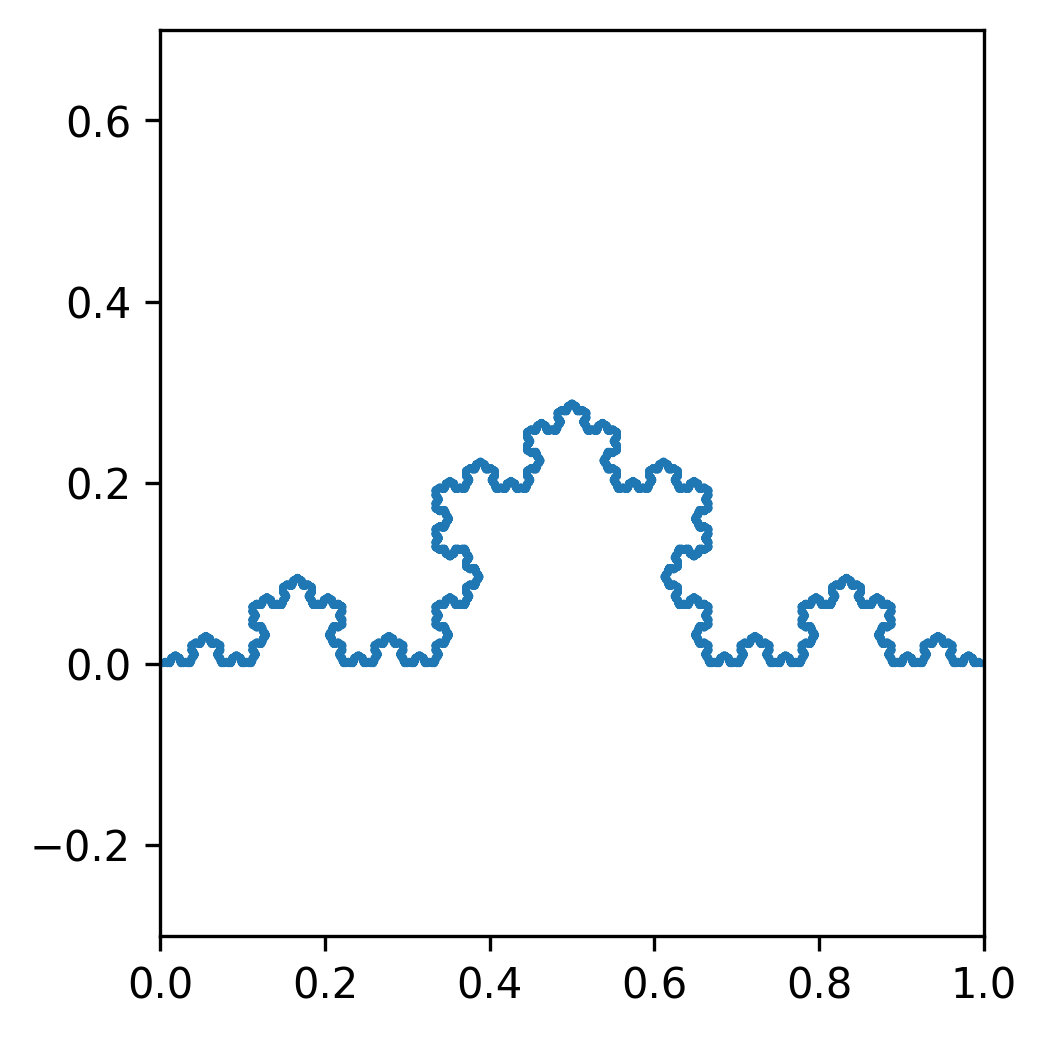

In [112]:
#implementing the final function on the begining points which is a horizontal line.          
points = np.array([[0.0,0.0],[1.0,0.0]])   
for i in range(7):
    points = total_line(points)

#plotting the fractal
final_points = points
x = [item[0] for item in final_points]
y = [item[1] for item in final_points]
plt.figure(dpi=300)
plt.plot(x,y)
ax = plt.gca()
ax.set_aspect(1.1) 
plt.xlim(0, 1)
plt.ylim(-0.3, 0.7)
plt.savefig('kokh with 7 steps', dpi=300, linewidth =0.01 )